# SVM - Evaluation On Datasets

This notebook analyzes on multiple datasets. This notebook
considers whether classifiers in ensembles were trained on
features with values compatible with the tests vector.

**TO DO**
1. Check the data to see if trained on Normoxia. 
1. Also, was training done on individual replicas? Are the data all features or just regulators?
1. Bar plot presentation of evaluations
1. Filter ensembles if test_vector is not contained in the training data.

# Preliminaries

In [1]:
import init
from common import constants as cn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
from common_python.plots import util_plots
from common_python.classifier import classifier_ensemble
from common_python.classifier import classifier_collection
from common import transform_data

import collections
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Data
Data used in the analysis.

In [2]:
DATA = TrinaryData(is_regulator=False, is_averaged=True, is_dropT1=True)
DATA.df_X.head()

,Rv1927,Rv1129c,Rv3085,Rv3083,Rv3086,Rv2226,Rv0260c,Rv1365c,Rv3084,Rv0975c,...,Rv3267,Rv2748c,Rv3260c,Rv0350,Rv2737c,Rv0440--Rv3417c,Rv2734,Rv0519c,Rv3418c,Rv3269
T2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
T6,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
df_sampleAM = transform_data.trinaryReadsDF(
    csv_file="AM_MDM_Mtb_transcripts_DEseq.csv", is_time_columns=False, is_display_errors=False)
df_sampleAW = transform_data.trinaryReadsDF(csv_file="AW_plus_v_AW_neg_Mtb_transcripts_DEseq.csv",
                                            is_time_columns=False, is_display_errors=False)

In [5]:
df_sampleAM = df_sampleAM.T
df_sampleAW.columns

Index(['AW_plus_1', 'AW_neg_1', 'AW_plus_3', 'AW_neg_3', 'AW_plus_4',
       'AW_neg_4'],
      dtype='object')

In [6]:
df_sampleAW = df_sampleAW.T
df_sampleAW.head()

GENE_ID,Rv0001,Rv0005,Rv0006,Rv0009,Rv0010c,Rv0011c,Rv0013,Rv0014c,Rv0016c,Rv0020c,...,Rvnt36,Rvnt37,Rvnt38,Rvnt39,Rvnt40,Rvnt41,Rvnt42,Rvnt43,Rvnt44,Rvnt45
AW_plus_1,0,0,0,0,-1,0,-1,0,0,0,...,0,0,-1,0,-1,0,-1,0,0,-1
AW_neg_1,1,1,0,0,-1,1,-1,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
AW_plus_3,0,0,0,0,-1,1,0,0,0,0,...,0,0,-1,0,-1,-1,-1,-1,-1,-1
AW_neg_3,1,0,0,0,-1,1,0,0,0,0,...,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
AW_plus_4,0,0,0,0,-1,1,0,0,0,0,...,0,0,-1,-1,-1,-1,-1,-1,-1,1


# Classification Validations of Controlled Samples
Classify T2-T25 and see if result is same as original class. Use 5-fold cross validation, where there is a holdout for each class and the selection is random.


Text(0, 0.5, 'accuracy')

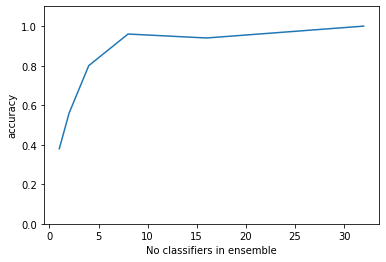

In [7]:
accuracy_dct = {}
for rank in [1, 2, 4, 8, 16, 32]:
    accuracy_dct[rank] = classifier_ensemble.ClassifierEnsemble.crossValidate(
        DATA, num_iter=10, num_holdout=1, filter_high_rank=rank)
plt.plot(list(accuracy_dct.keys()), list(accuracy_dct.values()))
plt.ylim([0, 1.1])
plt.xlabel("No classifiers in ensemble")
plt.ylabel("accuracy")

# Classification of Lab Samples

In [8]:
svm_ensemble = classifier_ensemble.ClassifierEnsemble(
        classifier_ensemble.ClassifierDescriptorSVM(), filter_high_rank=15, size=30)
df_X = DATA.df_X.copy()
df_X.columns = DATA.features
svm_ensemble.fit(df_X, DATA.ser_y)

In [9]:
svm_ensemble.predict(df_sampleAM)

,0,1,2,3,4
AM_D20_1,0.0,0.000000,1.000000,0.0,0.000000
AM_D20_3,0.0,0.066667,0.900000,0.0,0.033333
AM_D20_4,0.0,0.000000,0.033333,0.0,0.966667
AM_D20_5,0.0,0.000000,1.000000,0.0,0.000000
MDM_D20_1,0.0,0.966667,0.033333,0.0,0.000000
MDM_D20_3,0.0,1.000000,0.000000,0.0,0.000000
MDM_D20_4,0.0,0.000000,1.000000,0.0,0.000000
MDM_D20_5,0.0,1.000000,0.000000,0.0,0.000000


In [10]:
svm_ensemble.predict(df_sampleAW)

,0,1,2,3,4
AW_plus_1,0.0,0.866667,0.133333,0.0,0.0
AW_neg_1,0.0,0.000000,1.000000,0.0,0.0
AW_plus_3,0.0,0.000000,1.000000,0.0,0.0
AW_neg_3,0.0,0.000000,1.000000,0.0,0.0
AW_plus_4,0.0,0.000000,1.000000,0.0,0.0
AW_neg_4,0.0,0.866667,0.133333,0.0,0.0


# Support for Prediction